**Gloomhaven Prosperity: 2.25**

### Party Achievements:
- First Steps
- Jekserah's Plans
- Dark Bounty
- A map to treasure
  

### Global Achievements:
- The Merchant Flees
- The Power of Enhancement
- Water-Breathing  

  
### History:
- 12/10/2018: Black Barrow (1). Tom, Syl & Mo (New: Brute, Spellweaver, Cragheart. PA: First Steps)
- 19/10/2018: Borrow Lair (2). Tom, Syl, Mo
- 26/10/2018: Inox Encampement (3). Tom, Syl, Mo (PA: Jekserah's Plans)
- 30/10/2018: Magma Pit (63). Syl & Mo
- 02/11/2018: Crypt of the Damned (4). Syl, Mo
- 09/11/2018: Glommhaven Warehouse (8). Tom, Syl, Mo (GA: The Merchant Flees)
- 16/11/2018: Frozen Hollow (14). Tom, Syl, Mo  (retirement: Cragheart-Mo, GA: The Power of Enhancement)
- 21/11/2018: Chained Isle - fail (70). Tom & Mo (new: Quartermaster-Mo)
- 28/11/2018: Ruinous Crypt(5). Tom & Mo
- 05/12/2018: Sunkel Vessel (93). Tom & Mo (one chest left)
- 14/12/2018: Decaying Crypt (6). Tom & Mo (one chest left. PA: Dark Bounty)
- 21/12/2018: Drake Nest (43). Tom, Delph(c), Syl, Mo (new: Scoundrel-Delph. GA: Water-Breathing)
- 29/12/2018: Vibrant Grotto (7). Tom, Delph, Tonio, Mo (new: Mindthief-Tonio. retirement: Spellweaver-Tom)
- 05/01/2019: Temple of the seer (13). Tom, Delph, Mo(c) (new: Beast Tyran-Tom)
- 11/05/2019: Necromancer's Sanctum (20). Tom, Delph(c), Syl, Mo (bye bye Jekserah)
- 18/01/2019: Moutain Pass(16). Tom(c), Delph, Mo

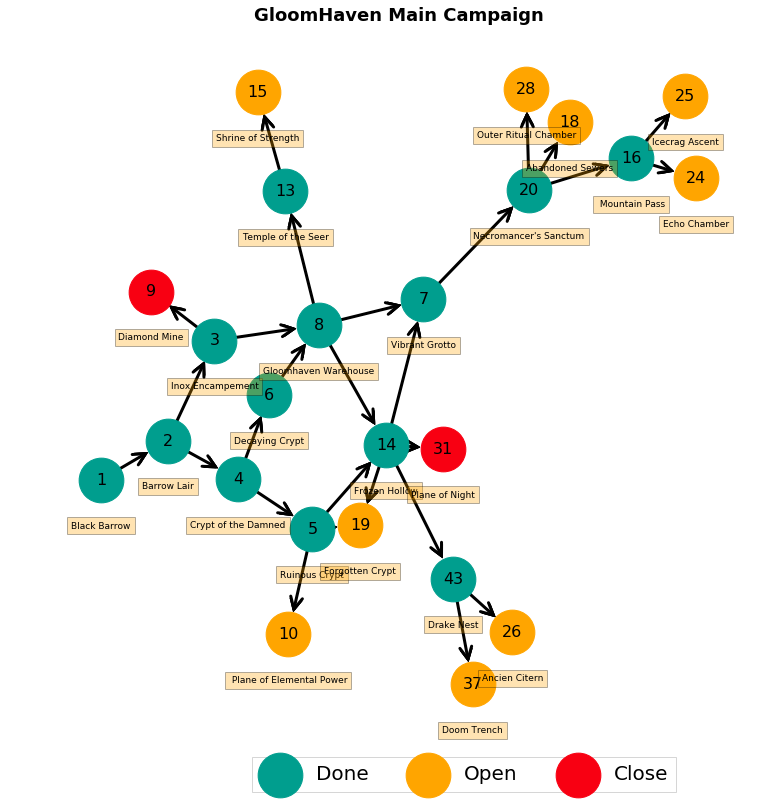

In [14]:
gloom_haven_plot("GloomEdgeList.csv", "GloomNodeCarac.csv", "GloomHaven Main Campaign")

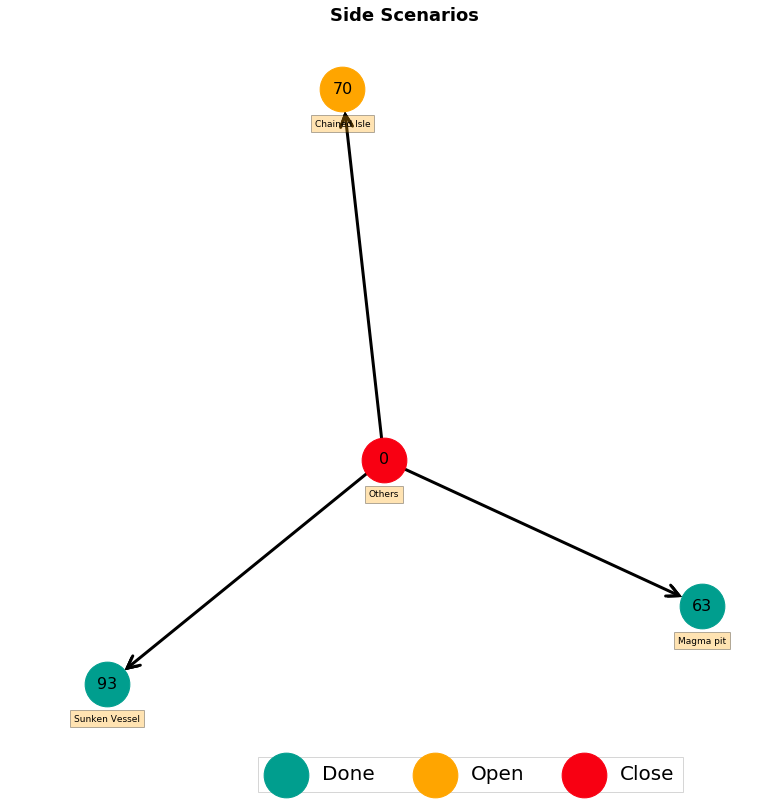

In [175]:
gloom_haven_plot("sideScenarios.csv", "GloomNodeCarac.csv", "Side Scenarios")

In [2]:
def gloom_haven_plot(edge_file, node_file, graph_title):
    """plot network graph from a list of edge ('edge_file') and a list
    of node ('node_file')"""

    import matplotlib.pyplot as plt
    import networkx as nx
    import pandas as pd

    # inputs & formating -------------------------------------------------------------------
    df = pd.read_csv(edge_file)
    carac = pd.read_csv(node_file, index_col="ID")
    network_o = nx.from_pandas_edgelist(df, 'from', 'to',
                                        create_using=nx.Graph())   # network plot object
    
    # extract informations of nodes present in network_o/df/GloomEdgeList.csv
    carac = carac.loc[list(network_o.nodes()), :]
    carac['status'] = pd.Categorical(carac['status'])   # formating color in the graph
    carac['status'].cat.codes

    # extract node positions
    pos = nx.spring_layout(network_o)
    
    # trick: spring_layout(above) work well on nx.Graph() but not with nx.DiGraph(), 
    # so network_o is set up again after pos assignement with create_using=nx.DiGraph()
    # Digraph(): "Direct Graph" is needed to draw arrows.
    network_o = nx.from_pandas_edgelist(df, 'from', 'to',
                                        create_using=nx.DiGraph())   # network plot object

    # frame with node infos (info+positions)
    pos_df = pd.DataFrame(pos, index=("X", "Y")).T
    pos_df.index.name = "ID"
    node_info = pd.merge(pos_df, carac, left_index=True, right_index=True)

    node_labels = {}             # dict format needed
    for i in node_info.index.values:
        node_labels[i] = i

    # plot -----------------------------------------------------------------------------------
    plt.figure(figsize=(10, 10))
    rednodes = list(node_info[node_info["status"] == "Done"].index)
    bluenodes = list(node_info[node_info["status"] == "Open"].index)
    greennodes = list(node_info[node_info["status"] == "Close"].index)

    #nx.draw_networkx_nodes
    nx.draw(network_o, pos=pos, nodelist=rednodes,
            node_color='#009E8E', label='Done', node_size=2000,
            alpha=1, arrowstyle="->", arrowsize=30, width=3)
    nx.draw(network_o, pos=pos, nodelist=bluenodes,
                           node_color='#FFA500', label='Open', node_size=2000,
                           alpha=1, arrowstyle="->", arrowsize=30)
    nx.draw(network_o, pos=pos, nodelist=greennodes,
                           node_color='#F80012', label='Close', node_size=2000,
                           alpha=1, arrowstyle="->", arrowsize=30)    
    nx.draw_networkx_labels(network_o, pos, node_labels, font_size=16)
    
    for i in node_info.index:   # plt.text() does not accept arrays as inputs: loop needed
        x = node_info.loc[i, "X"]
        y = node_info.loc[i, "Y"]
        title = node_info.loc[i, "title"]
        plt.text(x, y-0.1,
                 s=title,
                 bbox=dict(facecolor='orange', alpha=0.3),
                 horizontalalignment='center',
                 size=9)

    plt.title(graph_title, size=18, fontweight="bold")
    plt.axis('off')
    plt.legend(bbox_to_anchor=(0.9, 0.0),
               fancybox=False, shadow=False, ncol=3, prop={'size': 20})
    plt.show();